# Import Dependencies

In [1]:
#Import Basic Dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.datasets

In [17]:
#Import ML Dependencies
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from xgboost import XGBRegressor
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error as MSE, mean_absolute_error as MAE


In [3]:
#Load Dataset as a Series
house_price = sklearn.datasets.fetch_california_housing()

#Convert Dataset Series to DataFrame
df_housePrice = pd.DataFrame(house_price.data, columns = house_price.feature_names)

#Add target Value
df_housePrice['price'] = house_price.target

# Exploratory Analysis using Descriptive Statistics

In [4]:
#Observe the Summary Statistics
df_housePrice.describe().round(2)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,price
count,20640.00,20640.00,20640.00,20640.00,20640.00,20640.00,20640.00,20640.00,20640.00
mean,3.87,28.64,5.43,1.10,1425.48,3.07,35.63,-119.57,2.07
std,1.90,12.59,2.47,0.47,1132.46,10.39,2.14,2.00,1.15
min,0.50,1.00,0.85,0.33,3.00,0.69,32.54,-124.35,0.15
25%,2.56,18.00,4.44,1.01,787.00,2.43,33.93,-121.80,1.20
50%,3.53,29.00,5.23,1.05,1166.00,2.82,34.26,-118.49,1.80
75%,4.74,37.00,6.05,1.10,1725.00,3.28,37.71,-118.01,2.65
max,15.00,52.00,141.91,34.07,35682.00,1243.33,41.95,-114.31,5.00


The features have different magnitudes due to the context they have.  
Scaling will be needed.
Also Latitude and Longitude have negative signs that may need to be considered.  
Rain Forest and XGBoost handle these, but Clustering might be needed.

In [5]:
#Observe null values
df_housePrice.isna().sum()

MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
price         0
dtype: int64

Not null values are found, therefore Regression models can be applied.

# Check Correlation between Different Features

In [6]:
correlation = df_housePrice.corr()

<Axes: >

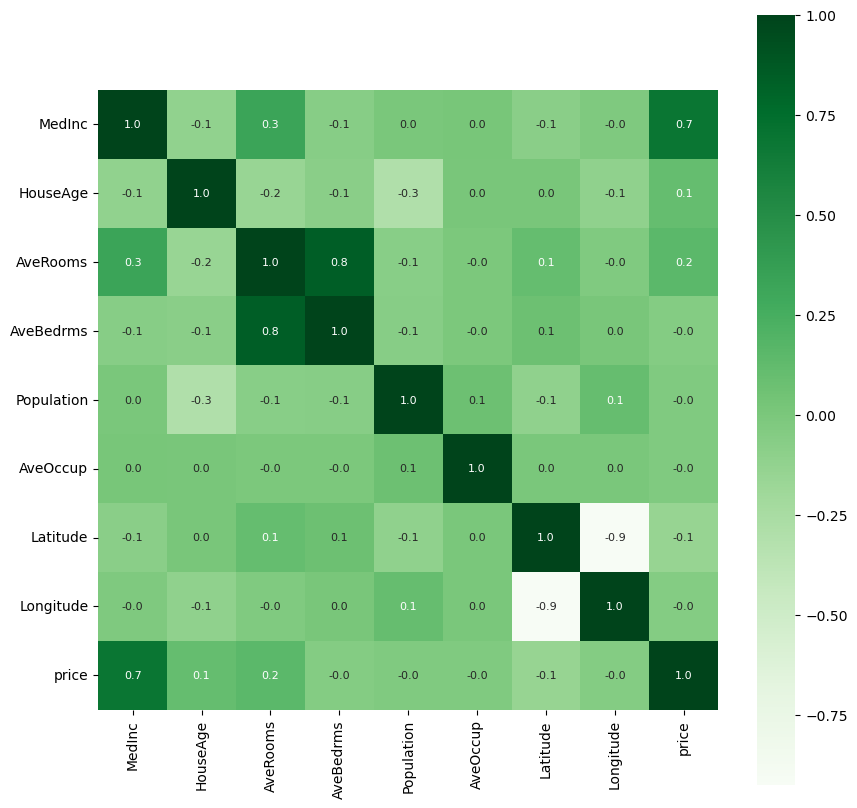

In [7]:
#Construct a heatmap of the correlation between features
plt.figure(figsize=(10,10))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size':8}, cmap='Greens')

It seems that MedInc is the feature that has the highest correlation with the price.

# Modelling using XGBoost

# Splitting the Data

In [8]:
#Split the features variable and target variable
X = df_housePrice.drop('price', axis=1)
y= df_housePrice['price']

In [9]:
#Split the dataset into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

# Train and Fit the XGBoost model

In [10]:
#Instantiate XGBRegressor
xgb = XGBRegressor()

#Train xgb model
xgb.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

## Performance Model Evaluation During Training

In [11]:
#Predict on training data
y_pred_train = xgb.predict(X_train)

#Evaluate using Mean Squared Error
score1 = MSE(y_train, y_pred_train)

#Evaluate using Mean Squared Error
score2 = MAE(y_train, y_pred_train)

print("The Mean Squared Error:  ", score1)
print("The Mean Absolute Error:  ", score2)

The Mean Squared Error:   0.07409416126887404
The Mean Absolute Error:   0.19257627556572793


The Error found during the Performance Evaluation in the Training Set is negligible.  This means that the model has fit well to the training data set.

The evaluation in the test set is needed to evaluate overfitting; the model could have memorized the training data set instead of generalized it.

## Visualizing Actual Price vs Predicted Price using the Training Data

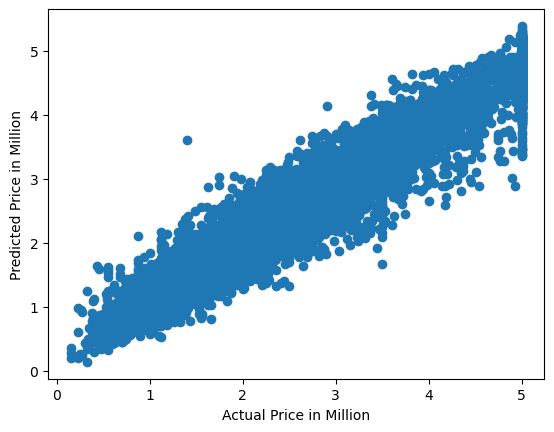

In [14]:
#Construct a Scatter Plot of Actual Price vs Predicted Price using the Training Data
plt.scatter(y_train, y_pred_train)
plt.xlabel('Actual Price in Million')
plt.ylabel('Predicted Price in Million')
plt.show()

As it is observed the predictions are very close to the actual values, being close to a relationship one to one, meaning that what is predicted is actually happening.  However, remember this is the training set, and the model already knew the labels.  

## Evaluate Performance in Test Data Set

In [12]:
#Predict using Test Data Set
y_pred_test = xgb.predict(X_test)

#Evaluate using MSE
score1_test = MSE(y_test, y_pred_test)

#Evaluate using MAE
score2_test = MAE(y_test, y_pred_test)

print("The Mean Squared Error: ", score1_test)
print("The Mean Absolute Error: ", score2_test)

The Mean Squared Error:  0.2225899267544737
The Mean Absolute Error:  0.30957335413783094


## Visualizing Actual Price vs Predicted Price using the Test Data

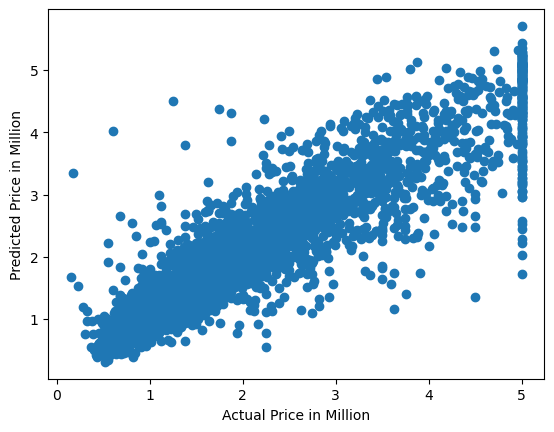

In [15]:
#Construct Scatter Plot of Actual Price vs Predicted Price using Test Data
plt.scatter(y_test, y_pred_test)
plt.xlabel('Actual Price in Million')
plt.ylabel('Predicted Price in Million')
plt.show()

We still see that the model was predicting close to the reality, however there are some predictions the model didn´t make it as accurate as expected.  Expanding the sample size could help, but also considering other model is a good approach.  

This is going to be evaluated applying Random Forest with Lasso as a possible ML algorithm.

# Modelling using Random Forest

## Instantiate and Fit Lasso

In [16]:
#Instantiate Lasso at alpha 0.1
lasso = Lasso(alpha=0.1, random_state=9)

#Fit the model to the train data set
lasso.fit(X_train, y_train)

#Requesting Lasso Coefficients
lasso_coef = lasso.coef_

#Selecting those features that Lasso has not shrunk.
X_train_lasso, X_test_lasso = X_train.iloc[:, lasso_coef>0], X_test.iloc[:, lasso_coef>0]

## Instantiate and Apply Random Forest using the features selected by Lasso

In [ ]:
#Setting Random Forest Hyperparameters
param_dist = {
    'n_estimators' : np.arange(1, 101, 1),
    'max_depth' : np.arange(1, 11, 1)
}

#Instantiate Random Forest Regressor
rf = RandomForestRegressor()

#Find the best hyperparameter using Randomized Search CV
rand_search = RandomizedSearchCV(rf, param_distributions=param_dist, cv=5, random_state=42)

#Fit Random Search Object to the Data
rand_search.fit(X_train, y_train)

#Assign best hyperparameters to the variable best_hyper
best_hyper = rand_search.best_params_

#Instantiate Random Forest using the Best Hyperparameters
rf_lasso = RandomForestRegressor(
    n_estimators=best_hyper['n_estimators'], 
    max_depth=best_hyper['max_depth'], 
    random_state=42)

#Fit Random Forest to the features selected by Lasso
rf_lasso.fit(X_train_lasso, y_train)


## Evaluate Model's Performance using Training Data

In [21]:
#Predict labels using the Random Forest model
y_pred_rfLasso_train = rf_lasso.predict(X_train_lasso)

#Evaluate Performance using MSE and MSA
MSE_rf = MSE(y_train, y_pred_rfLasso_train)
MSA_rf = MAE(y_train, y_pred_rfLasso_train)

print('The Mean Squared Error using Random Forest is: ', MSE_rf)
print('The Mean Absolute Error using Random Forest is: ', MSA_rf)

The Mean Squared Error using Random Forest is:  0.48279652434313575
The Mean Absolute Error using Random Forest is:  0.5174495287646607


## Visualize Actual Value vs Prediction

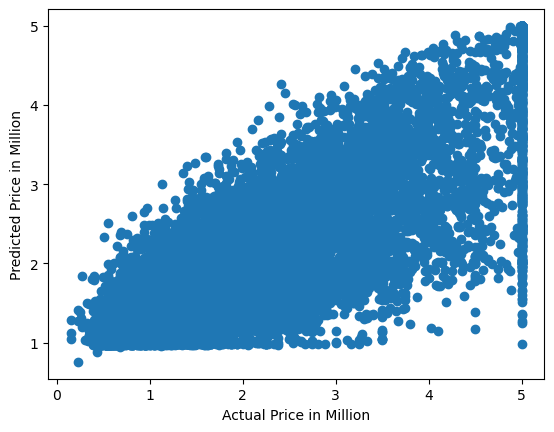

In [23]:
#Construc Scatter Plot of the Actual Price vs Predicted Price using Training Data.
plt.scatter(y_train, y_pred_rfLasso_train)
plt.xlabel('Actual Price in Million')
plt.ylabel('Predicted Price in Million')
plt.show()

## Evaluate Model's Performance using Test Data

In [22]:
#Predict labels using the Random Forest model
y_pred_rfLasso_test = rf_lasso.predict(X_test_lasso)

#Evaluate Performance using MSE and MSA
MSE_rf = MSE(y_test, y_pred_rfLasso_test)
MSA_rf = MAE(y_test, y_pred_rfLasso_test)

print('The Mean Squared Error using Random Forest is: ', MSE_rf)
print('The Mean Absolute Error using Random Forest is: ', MSA_rf)

The Mean Squared Error using Random Forest is:  0.6021214999393967
The Mean Absolute Error using Random Forest is:  0.5664046737050094


## Visualize Actual Price vs Predicted Price using Test Data

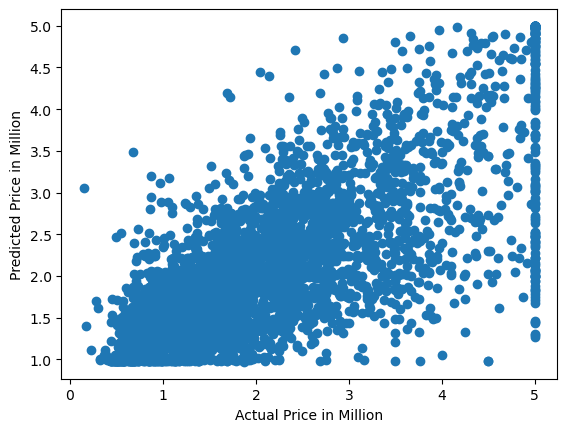

In [24]:
#Construc Scatter Plot of the Actual Price vs Predicted Price using Training Data.
plt.scatter(y_test, y_pred_rfLasso_test)
plt.xlabel('Actual Price in Million')
plt.ylabel('Predicted Price in Million')
plt.show()

It seems that from the two approaches that were applied the XGBoost has the best performance.  It is important to mention that the Random Forest model seems to be more constant; this could be showing that XGB is more influentiable by overfitting than Random Forest.  I will include also R2_score to double check this.

Also the computational performance is more expensive in Random Forest combined with Lasso.